In [1]:
import pandas as pd
import numpy as np
df3= pd.read_csv('EW_csv.csv',encoding='CP949')


In [2]:
temp3= ~((df3.대표자연령구간 == '10대미만') | (df3.대표자연령구간 == '90대이상') | (df3.대표자연령구간 == '정보없음'))
df3=df3[temp3]

In [3]:
df3['기준일자']=df3['기준일자'].astype('str')
df3['기준일자']=pd.to_datetime(df3['기준일자'])

In [4]:
test3 = df3.groupby(['시도','기준일자','EW등급'])['EW등급'].count()
test3=pd.DataFrame(test3)

test3=test3.unstack()
test3 = test3.fillna(0)
test3=test3.reset_index()
test3

시도       기준일자 EW등급                                       
EW등급                  관심   관찰1   관찰2  관찰3  부도     정상    폐업   휴업
0     강원 2018-01-01  671   906  1249  432  17  17624  3074   70
1     강원 2018-02-01  640   931  1296  443  17  17784  3109   65
2     강원 2018-03-01  623   941  1269  460  18  17897  3122   72
3     강원 2018-04-01  629   950  1227  471  17  18077  3152   76
4     강원 2018-05-01  612   974  1315  464  18  18186  3190   82
..    ..        ...  ...   ...   ...  ...  ..    ...   ...  ...
607   충북 2020-08-01  508  1098  1881  676  13  25326  6112  114
608   충북 2020-09-01  492  1067  1774  576  11  25004  6927  127
609   충북 2020-10-01  470  1047  1715  578  12  25227  6991  124
610   충북 2020-11-01  486  1054  1671  576  13  25368  7034  124
611   충북 2020-12-01  457  1064  1724  566  13  25537  7086  116

[612 rows x 10 columns]

In [5]:
cha=[]
for i,j in enumerate(test3['EW등급']['폐업']):
    cha.append(j)

In [6]:
cha_t=[]
for i,j in enumerate(cha):
    if i%36==0:
        cha_t.append(0)
    else:
        cha_t.append(cha[i]-cha[i-1])


In [7]:
test3['전월폐업비교']=cha_t

In [8]:
temp2=test3.iloc[:,:2]

In [9]:
temp2['전월폐업비교']=cha_t

In [10]:
temp2

,시도,기준일자,전월폐업비교
EW등급,,,
0,강원,2018-01-01,0
1,강원,2018-02-01,35
2,강원,2018-03-01,13
3,강원,2018-04-01,30
4,강원,2018-05-01,38
...,...,...,...
607,충북,2020-08-01,42
608,충북,2020-09-01,815
609,충북,2020-10-01,64


In [11]:
res=temp2.loc[temp2.groupby(['시도'])['전월폐업비교'].idxmax()]
res

,시도,기준일자,전월폐업비교
EW등급,,,
32,강원,2020-09-01,568
68,경기,2020-09-01,6429
104,경남,2020-09-01,1373
140,경북,2020-09-01,1050
176,광주,2020-09-01,929
212,대구,2020-09-01,978
248,대전,2020-09-01,709
284,부산,2020-09-01,1590
320,서울,2020-09-01,6065


In [12]:
res.set_index('시도')

,기준일자,전월폐업비교
EW등급,,
시도,,
강원,2020-09-01,568
경기,2020-09-01,6429
경남,2020-09-01,1373
경북,2020-09-01,1050
광주,2020-09-01,929
대구,2020-09-01,978
대전,2020-09-01,709
부산,2020-09-01,1590


In [13]:
col_li=['시도','기준일자','전월폐업비교']
res.columns=col_li
res

,시도,기준일자,전월폐업비교
32,강원,2020-09-01,568
68,경기,2020-09-01,6429
104,경남,2020-09-01,1373
140,경북,2020-09-01,1050
176,광주,2020-09-01,929
212,대구,2020-09-01,978
248,대전,2020-09-01,709
284,부산,2020-09-01,1590
320,서울,2020-09-01,6065
356,세종,2020-09-01,99


In [14]:
res=res.set_index('시도')


In [15]:
res

,기준일자,전월폐업비교
시도,,
강원,2020-09-01,568
경기,2020-09-01,6429
경남,2020-09-01,1373
경북,2020-09-01,1050
광주,2020-09-01,929
대구,2020-09-01,978
대전,2020-09-01,709
부산,2020-09-01,1590
서울,2020-09-01,6065


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [17]:
res['mon']=res['기준일자'].dt.month

<AxesSubplot:xlabel='mon', ylabel='count'>

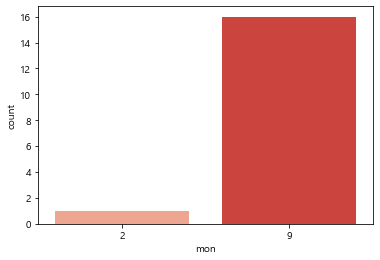

In [18]:
sns.countplot(x='mon', data=res,palette="Reds")